# MNIST Original Hand-written Images

In [1]:
import joblib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
train=pd.read_csv('../static/data/mnist/train.csv', header=0, index_col=None)
train.shape

(42000, 785)

In [4]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    train.iloc[:, 1:], train.label, stratify=train.label, test_size=0.25, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [18]:
df_test = pd.DataFrame(X_test, columns=test.columns)
df_test['target'] = y_test
df_test.to_csv('../static/data/mnist/mnist_test.csv', index=False)

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [8]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((31500, 784), (10500, 784))

In [9]:
joblib.dump(scaler, '../static/model/mnist_scaler.pkl')

['../static/model/mnist_scaler.pkl']

In [10]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
params = {
    #'C': [0.1, 1, 10]
    'C': [5, 10, 20]
}

In [12]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5, 
                       verbose=1, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 13.8min finished
최고 평균 정확도: 0.9789
최적 파라미터: {'C': 10}


In [13]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9767619047619047

In [14]:
joblib.dump(best_sv, '../static/model/mnist_sv.pkl')

['../static/model/mnist_sv.pkl']

### Test

In [8]:
scaler = joblib.load('../static/model/mnist_scaler.pkl')
best_sv = joblib.load('../static/model/mnist_sv.pkl')

In [31]:
index = 900
test_data = X_test.iloc[index:index+3, :].values
test_data.shape

(3, 784)

In [32]:
test_scaled = scaler.transform(test_data)

In [26]:
label_list = y_test[index:index+3]
label_list

26912    3
20086    3
36337    0
Name: label, dtype: int64

In [27]:
pred_sv = best_sv.predict(test_scaled)
pred_sv

array([3, 3, 0], dtype=int64)

- 시각화하기

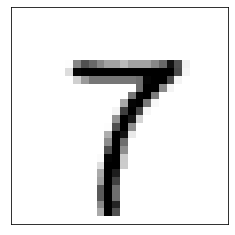

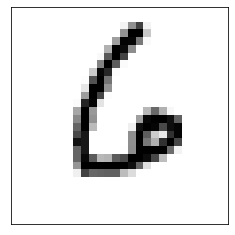

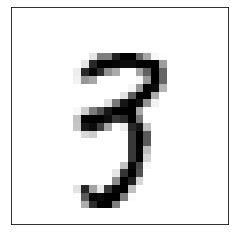

In [34]:
for i in range(3):
    digit = test_data[i].reshape(28,28)
    plt.figure(figsize=(4,4))
    plt.xticks([]); plt.yticks([])
    plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')

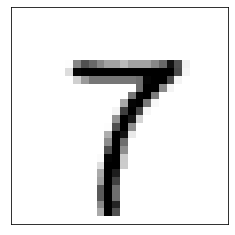

In [33]:
plt.figure(figsize=(4,4))
plt.xticks([]); plt.yticks([])
plt.imshow(test_data[0].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
plt.show()

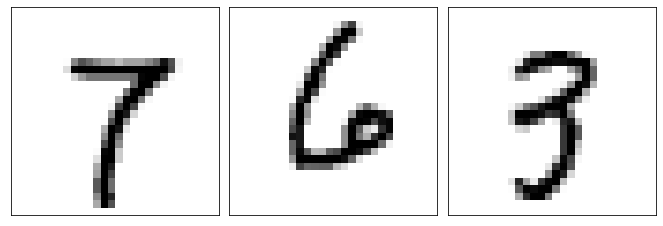

In [36]:
fig = plt.figure(figsize=(12, 4))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    ax = fig.add_subplot(1, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(test_data[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')